In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h, c, e
import os
from PIL import Image
import numpy as np
import pandas as pd

def process_phsp_file(filename):
    with open(filename, 'r') as file:

        # Initialize lists to store extracted data
        energies = []
        positions = []
        direction_cosines = []
        
        for line in file:
            # Split the line into columns
            columns = line.split()  # Assuming space-separated values

            # Check if the line corresponds to a photon
            if columns[7] == '-22':  
                energy = float(columns[5])  # Energy in MeV
                position = (float(columns[0]), float(columns[1]), float(columns[2]))  # Positions X, Y, Z
                direction_cosine = (float(columns[3]), float(columns[4]), float(columns[8]))  # Direction cosines X, Y, Z

                energies.append(energy)
                positions.append(position)
                direction_cosines.append(direction_cosine)

    # Here you can process the extracted data further or save it, etc.
    return energies, positions, direction_cosines


def Mev_to_wavelength(energy_Mev):
    # Convert energy from eV to wavelength in meters
    energy_joules = 10**6 * energy_Mev * e
    wavelength_m = h * c / energy_joules
    return wavelength_m

def create_histogram(data, bins):
    # Accumulate the photons in a 2D histogram
    # Assuming data contains x, y positions
    histogram, _, _ = np.histogram2d(data[:,1], data[:,2], bins=bins)
    return histogram

def simulate_camera(histogram, intrinsic_params, extrinsic_params):
    # Simulate the virtual camera recording the photons
    # This is a placeholder function; you need to implement the camera model
    # using the intrinsic and extrinsic parameters provided
    # This function should project the 2D histogram onto the camera sensor
    camera_image = np.zeros_like(histogram)  # Placeholder for the camera image
    return camera_image


optical_phasespace_ref_slice01_mus_689_mua_011


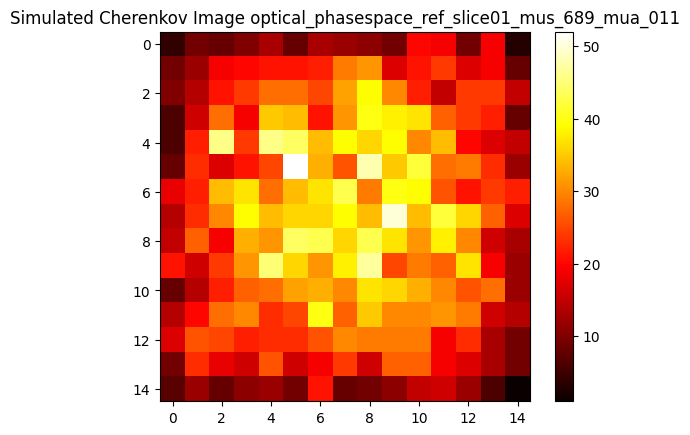

optical_phasespace_ref_slice01_mus_689_mua_061


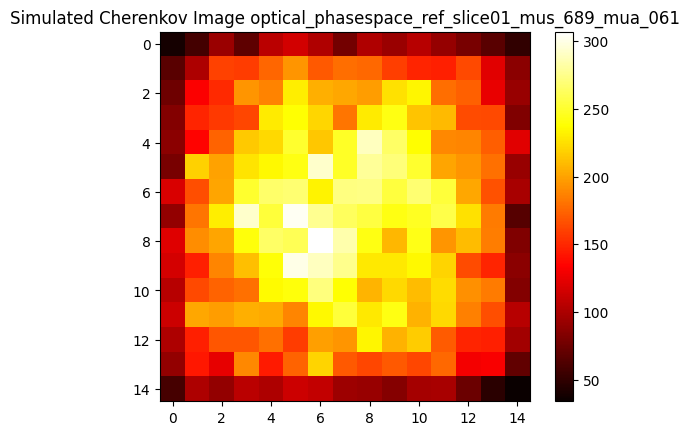

optical_phasespace_ref_slice01_mus_1089_mua_04


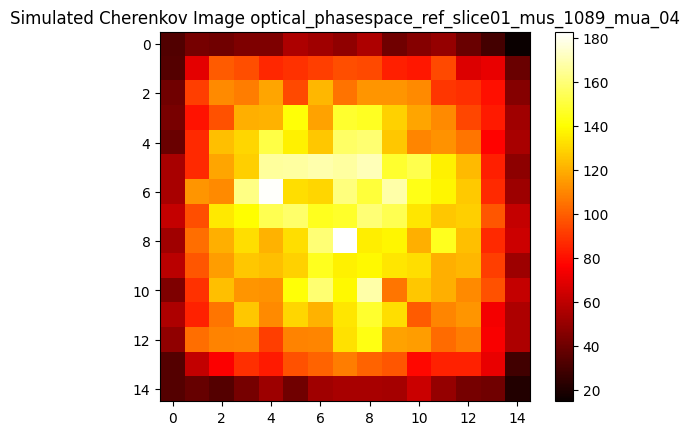

optical_phasespace_ref_slice01_mus_1089_mua_011


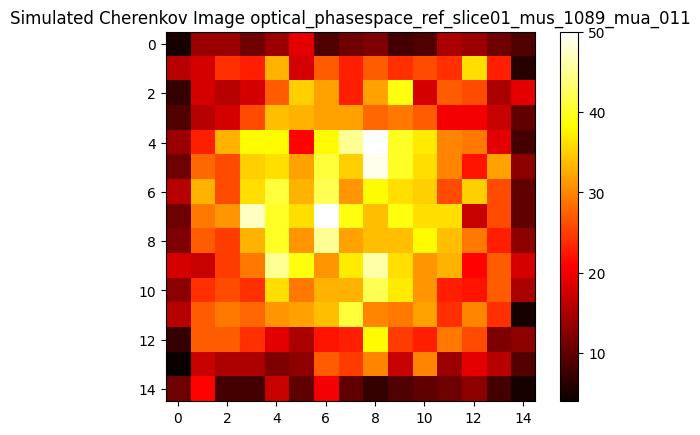

optical_phasespace_ref_slice01_mus_689_mua_04


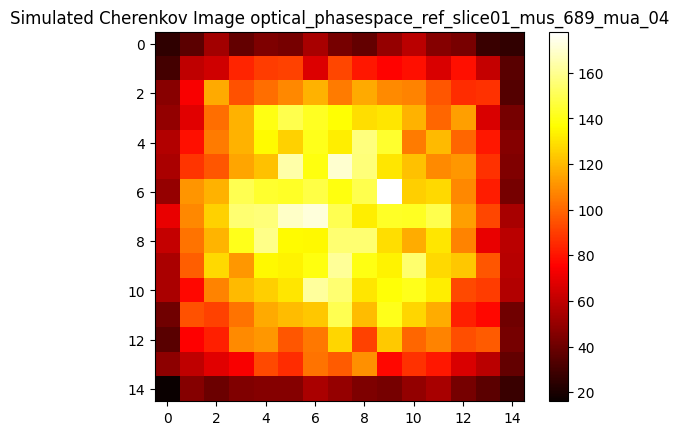

optical_phasespace_ref_slice01_mus_2035_mua_061


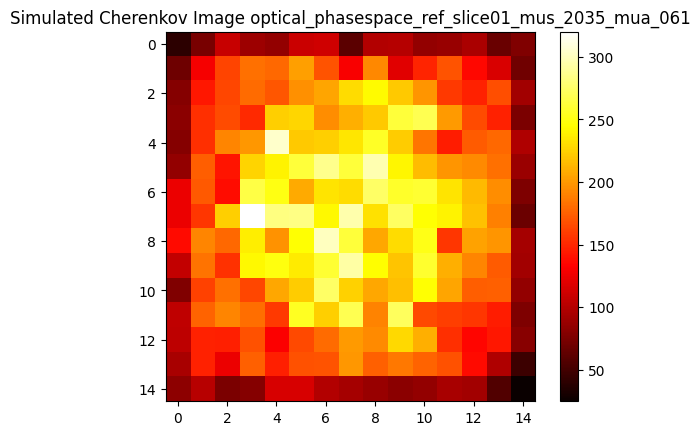

optical_phasespace_ref_slice01_mus_2035_mua_04


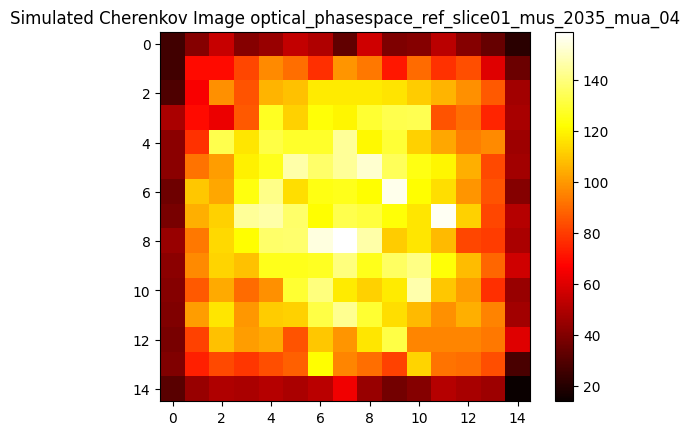

optical_phasespace_ref_slice01_mus_2035_mua_011


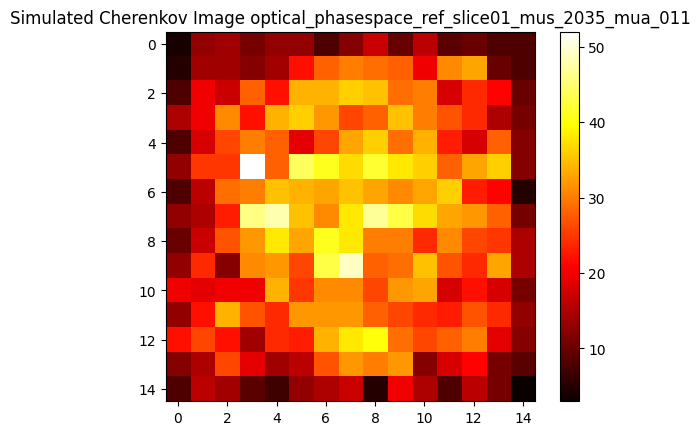

optical_phasespace_ref_slice01_mus_1089_mua_061


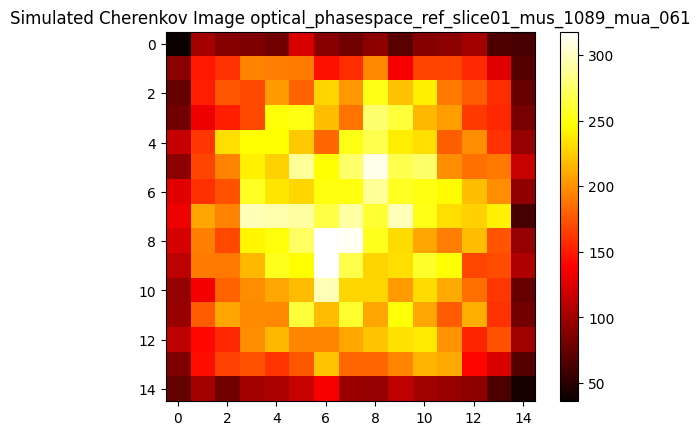

In [15]:
filenames = []

# Main workflow
directory = os.listdir("/Applications/topas/OpticalPhantomTOPAS/OutputElectrons/")
for item in directory:
    if(item.startswith("optical_phasespace_ref_slice01") and item.endswith(".phsp")):
        filenames.append(item)
    
for filename in filenames:
    phantomname = filename.split(".")[0]
    print(phantomname)
    fullfilename = "/Applications/topas/OpticalPhantomTOPAS/OutputElectrons/" + filename

    # Get out energies, positions, and direction_cosigns
    energies, positions, direction_cosines= process_phsp_file(fullfilename)

    # Convert energy to wavelength
    wavelengths = 10**9 * np.array([Mev_to_wavelength(energy) for energy in energies])

    # Calculate the quantum efficiency per wavelength
    #efficiences = lookupQuantumEfficiencies(wavelengths)

    bins = 15
    histogram, xedges, yedges = np.histogram2d(
        [row[0] for row in positions],  # x positions
        [row[1] for row in positions],  # y positions
        bins=[bins, bins]  # specifying the bin size for both dimensions
    )

    plt.imshow(histogram, cmap='hot')
    plt.colorbar()
    plt.title("Simulated Cherenkov Image " + phantomname)
    plt.show()

    # Convert the numpy array to a PIL image
    image = (Image.fromarray(np.uint16(histogram)))

    # Save the image
    image.save('/Applications/topas/OpticalPhantomTOPAS/OutputCherenkovImages/Cherenkov_image' + phantomname + '.tif')

In [13]:
phantomname = ('mua'+ filename.split("_")[-1].split(".")[0] + 'mus' + filename.split("_")[-1].split(".")[1])
filename.split(".")[0]


'optical_phasespace_ref_slice01_mus_1089_mua_061'

In [ ]:

# NEED TO SIMULATE CAMERA HERE

# Define your camera's intrinsic and extrinsic properties
intrinsic_params = {"param1": value1, "param2": value2}  # Placeholder values
extrinsic_params = {"param1": value1, "param2": value2}  # Placeholder values

# Simulate the camera recording the photons
camera_image = simulate_camera(histogram, intrinsic_params, extrinsic_params)

# Display the camera image
plt.imshow(camera_image, cmap='hot')
plt.colorbar()
plt.title("Simulated Camera Image")
plt.show()
